In [1]:
library(haven)
library(tidyverse)
library(broom)
library(lme4) 
library(latex2exp)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Loading required package: Matrix

Attaching package: 'Matrix'

The following object is masked from 'package:tidyr':

    expand



In [2]:
AA_Sex_1 <- read_sav("C:/Users/Personal/AA leche/datos/AMINOACIDOS POR SEXO_1.sav")
head(AA_Sex_1) 

ID,GROUP,MATERNALAGE,SEXO,INFANTDOB,MATBMI1COLL,MATBMI215d,MATBMI32mos,MATBMI44mos,BABYWeigth1g,...,ALAGLOB,ASNGLOB,SYSGLOB,GLYGLOB,GLUGLOB,GLNGLOB,PROLINEGLOB,SERINEGLOB,TYRAMINEGLOB,new
1,0,17,1,2009-08-20,25,24,24,22,3492.7,...,21.25,0.5,1.00,10.00,87.25,23.25,2.75,8.0,1.00,0
2,0,16,2,2009-08-24,32,31,30,29,3392.9,...,18.25,0.0,0.75,13.75,100.50,40.50,2.50,9.5,0.75,0
3,0,17,2,2009-08-21,23,23,NA,NA,2993.8,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
4,0,16,2,2009-08-21,26,NA,NA,NA,3692.3,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
5,0,16,NA,2009-08-29,25,NA,NA,NA,3592.5,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
6,0,16,2,2009-08-27,29,28,30,31,3093.5,...,15.50,0.5,1.50,10.25,74.75,30.00,5.25,8.0,2.00,0


In [3]:
AA_E <- AA_Sex_1 %>%  select(id = ID, group = GROUP, age = MATERNALAGE, sex = SEXO, 62:97) %>%
                         mutate(id = factor(id), 
                                sex =  factor(sex, labels = c('girl', 'boy')),
                                group = factor(group, labels = c('teen', 'adult'))) 


names(AA_E)

Warning message:
"`as_dictionary()` is soft-deprecated as of rlang 0.3.0.
Please use `as_data_pronoun()` instead
This warning is displayed once per session."Warning message:
"`new_overscope()` is soft-deprecated as of rlang 0.2.0.
Please use `new_data_mask()` instead
This warning is displayed once per session."Warning message:
"The `parent` argument of `new_data_mask()` is deprecated.
The parent of the data mask is determined from either:

  * The `env` argument of `eval_tidy()`
  * Quosure environments when applicable
This warning is displayed once per session."Warning message:
"`overscope_clean()` is soft-deprecated as of rlang 0.2.0.
This warning is displayed once per session."

[1] "id"            "group"         "age"           "sex"          
 [5] "HISCalostrum"  "HISTransition" "HISMature2m"   "HISMature4m"  
 [9] "ILECalostrum"  "ILETransition" "ILEMature2m"   "ILEMature4m"  
[13] "LEUCalostrum"  "LEUTransition" "LEUMature2m"   "LEUMature4m"  
[17] "LYSCalostrum"  "LYSTransition" "LYSMature2m"   "LYSMature4m"  
[21] "METCalostrum"  "METTransition" "METMature2m"   "METMature4m"  
[25] "PHECalostrum"  "PHETransition" "PHEMature2m"   "PHEMature4m"  
[29] "THRCalostrum"  "THRTransition" "THRMature2m"   "THRMature4m"  
[33] "TRPCalostrum"  "TRPTransition" "TRPMature2m"   "TRPMature4m"  
[37] "VALCalostrum"  "VALTransition" "VALMature2m"   "VALMature4m"

In [5]:
AA_NE <- AA_Sex_1 %>%  select(id = ID, group = GROUP, age = MATERNALAGE, sex = SEXO, 58:61, 102:141) %>%
                         mutate(id = factor(id), 
                                sex =  factor(sex, labels = c('girl', 'boy')),
                                group = factor(group, labels = c('teen', 'adult'))) 

names(AA_NE)

[1] "id"            "group"         "age"           "sex"          
 [5] "ARGCalostrum"  "ARGTransition" "ARGMature2m"   "ARGMature4m"  
 [9] "ASPCalostrum"  "ASPTransition" "ASPMature2m"   "ASPMature4m"  
[13] "ALACalostrum"  "ALATransition" "ALAMature2m"   "ALAMature4m"  
[17] "ASNCalostrum"  "ASNTransition" "ASNMature2m"   "ASNMature4m"  
[21] "CYSCalostrum"  "CYSTransition" "CYSMature2m"   "CYSMature4m"  
[25] "GLYCalostrum"  "GLYTransition" "GLYMature2m"   "GLYMature4m"  
[29] "GLUCalostrum"  "GLUTransition" "GLUMature2m"   "GLUMature4m"  
[33] "GLNCalostrum"  "GLNTransition" "GLNMature2m"   "GLNMature4m"  
[37] "PROCalostrum"  "PROTransition" "PROMature2m"   "PROMature4m"  
[41] "SERCalostrum"  "SERTransition" "SERMature2m"   "SERMature4m"  
[45] "TYRCalostrum"  "TYRTransition" "TYRMature2m"   "TYRMature4m"

In [6]:
# Removing NAs
AA_E_Long <- AA_E %>% gather(weekNames, level, 5:length(names(AA_E))) 
AA_NE_Long <- AA_NE %>% gather(weekNames, level, 5:length(names(AA_NE))) 

head(AA_E_Long)

Warning message:
"attributes are not identical across measure variables; they will be dropped"Warning message:
"attributes are not identical across measure variables; they will be dropped"

id,group,age,sex,weekNames,level
1,teen,17,girl,HISCalostrum,2
2,teen,16,boy,HISCalostrum,1
3,teen,17,boy,HISCalostrum,2
4,teen,16,boy,HISCalostrum,1
5,teen,16,NA,HISCalostrum,1
6,teen,16,boy,HISCalostrum,1


In [7]:
AA_E_Long <- 
    AA_E_Long %>% 
        mutate(week = gsub(".*Calostrum.*", "1", weekNames)) %>%
        mutate(week = gsub(".*Transition.*", "2", week)) %>%
        mutate(week = gsub(".*Mature2m.*", "8", week)) %>%
        mutate(week = gsub(".*Mature4m.*", "16", week)) %>% 
        mutate(week = as.numeric(week))

AA_E_Long <- 
    AA_E_Long %>% 
        mutate(AA = gsub("Calostrum.*", "", weekNames)) %>%
        mutate(AA = gsub("Transition.*", "", AA)) %>%
        mutate(AA = gsub("Mature2m.*", "", AA)) %>%
        mutate(AA = gsub("Mature4m.*", "", AA))

head(AA_E_Long)

id,group,age,sex,weekNames,level,week,AA
1,teen,17,girl,HISCalostrum,2,1,HIS
2,teen,16,boy,HISCalostrum,1,1,HIS
3,teen,17,boy,HISCalostrum,2,1,HIS
4,teen,16,boy,HISCalostrum,1,1,HIS
5,teen,16,NA,HISCalostrum,1,1,HIS
6,teen,16,boy,HISCalostrum,1,1,HIS


In [39]:
AA_NE_Long <- 
    AA_NE_Long %>% 
        mutate(week = gsub(".*Calostrum.*", "1", weekNames)) %>%
        mutate(week = gsub(".*Transition.*", "2", week)) %>%
        mutate(week = gsub(".*Mature2m.*", "8", week)) %>%
        mutate(week = gsub(".*Mature4m.*", "16", week)) %>% 
        mutate(week = as.numeric(week))

AA_NE_Long <- 
    AA_NE_Long %>% 
        mutate(AA = gsub("Calostrum.*", "", weekNames)) %>%
        mutate(AA = gsub("Transition.*", "", AA)) %>%
        mutate(AA = gsub("Mature2m.*", "", AA)) %>%
        mutate(AA = gsub("Mature4m.*", "", AA))

head(AA_NE_Long)

id,group,age,sex,weekNames,level,week,AA
1,teen,17,girl,ARGCalostrum,1,1,ARG
2,teen,16,boy,ARGCalostrum,1,1,ARG
3,teen,17,boy,ARGCalostrum,1,1,ARG
4,teen,16,boy,ARGCalostrum,1,1,ARG
5,teen,16,NA,ARGCalostrum,2,1,ARG
6,teen,16,boy,ARGCalostrum,2,1,ARG


## Weight and size of babies

In [82]:
weight <- AA_Sex_1 %>% select(id = ID, group = GROUP, sex = SEXO, 10:13) %>% 
                        mutate(id = factor(id), 
                               sex =  factor(sex, labels = c('girl', 'boy')),
                               group = factor(group, labels = c('teen', 'adult')))

headC <- AA_Sex_1 %>% select(id = ID, group = GROUP, sex = SEXO, 14:17) %>% 
                        mutate(id = factor(id), 
                               sex =  factor(sex, labels = c('girl', 'boy')),
                               group = factor(group, labels = c('teen', 'adult')))


head(weight)

id,group,sex,BABYWeigth1g,BABYWeigth2g,BABYWeigth3g,BABYWeigth4g
1,teen,girl,3492.7,3592.5,5488.6,8282.74
2,teen,boy,3392.9,4091.5,5987.5,7883.57
3,teen,boy,2993.8,3592.5,NA,NA
4,teen,boy,3692.3,NA,NA,NA
5,teen,NA,3592.5,NA,NA,NA
6,teen,boy,3093.5,3392.9,4989.6,6785.80


In [83]:
weightLong <- weight %>% gather(weekNames, weight, -id, -group, -sex)
headCLong <- headC %>% gather(weekNames, head_c, -id, -group, -sex)

weightLong %>% filter(id == 4)
headCLong %>% filter(id == 4)

Warning message:
"attributes are not identical across measure variables; they will be dropped"Warning message:
"attributes are not identical across measure variables; they will be dropped"

id,group,sex,weekNames,weight
4,teen,boy,BABYWeigth1g,3692.3
4,teen,boy,BABYWeigth2g,NA
4,teen,boy,BABYWeigth3g,NA
4,teen,boy,BABYWeigth4g,NA


id,group,sex,weekNames,head_c
4,teen,boy,HeadCircumcm1,37
4,teen,boy,HCcm2,NA
4,teen,boy,HCcm3,NA
4,teen,boy,HCcm4,NA


In [84]:
weightLong <- 
    weightLong %>% 
        mutate(week = gsub(".*1g", "1", weekNames)) %>%
        mutate(week = gsub(".*2g", "2", week)) %>%
        mutate(week = gsub(".*3g", "8", week)) %>%
        mutate(week = gsub(".*4g", "16", week)) %>% 
        mutate(week = as.numeric(week))

weightLong %>% filter(id == 1)

id,group,sex,weekNames,weight,week
1,teen,girl,BABYWeigth1g,3492.70,1
1,teen,girl,BABYWeigth2g,3592.50,2
1,teen,girl,BABYWeigth3g,5488.60,8
1,teen,girl,BABYWeigth4g,8282.74,16


In [85]:
headCLong <- 
    headCLong %>% 
        mutate(week = gsub(".*cm1", "1", weekNames)) %>%
        mutate(week = gsub(".*cm2", "2", week)) %>%
        mutate(week = gsub(".*cm3", "8", week)) %>%
        mutate(week = gsub(".*cm4", "16", week)) %>% 
        mutate(week = as.numeric(week))

headCLong %>% filter(id == 1)

id,group,sex,weekNames,head_c,week
1,teen,girl,HeadCircumcm1,34,1
1,teen,girl,HCcm2,37,2
1,teen,girl,HCcm3,39,8
1,teen,girl,HCcm4,42,16


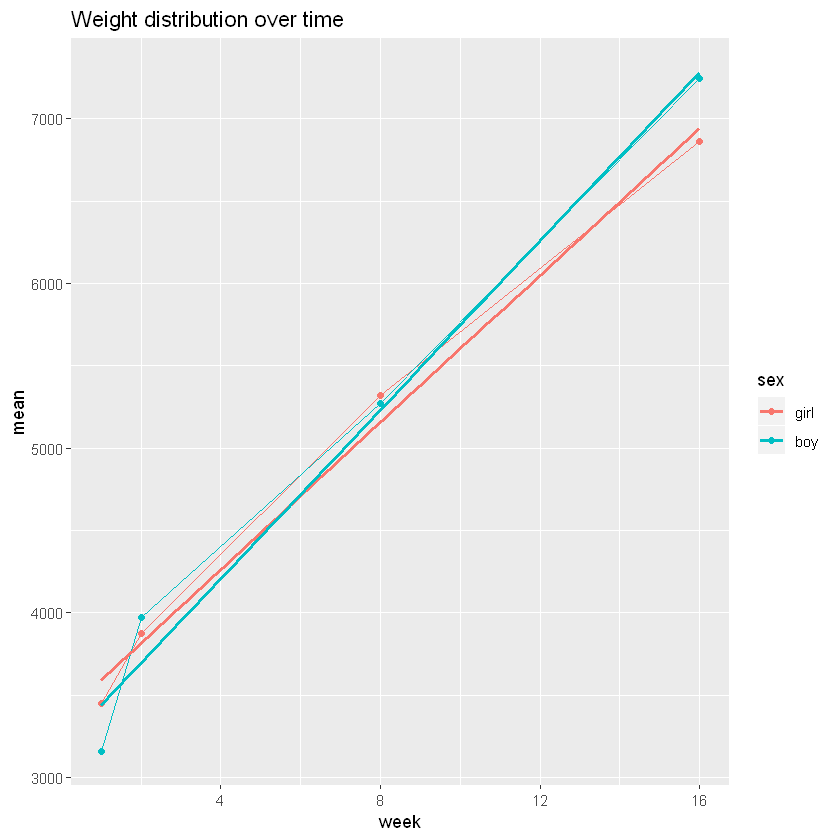

In [120]:
weightDist <- weightLong %>% filter(!is.na(sex)) %>% group_by(sex, week) %>% 
        summarise(mean = mean(weight, na.rm = T), sd = sd(weight, na.rm = T))

#weightDist
ggplot(weightDist, aes(x = week, y = mean, color = sex)) + 
    geom_point() + 
    #geom_linerange(aes(ymin = mean - 2*sd, ymax = mean + 2*sd)) + 
    geom_line() + geom_smooth(method = lm, se = F) +
    ggtitle('Weight distribution over time')

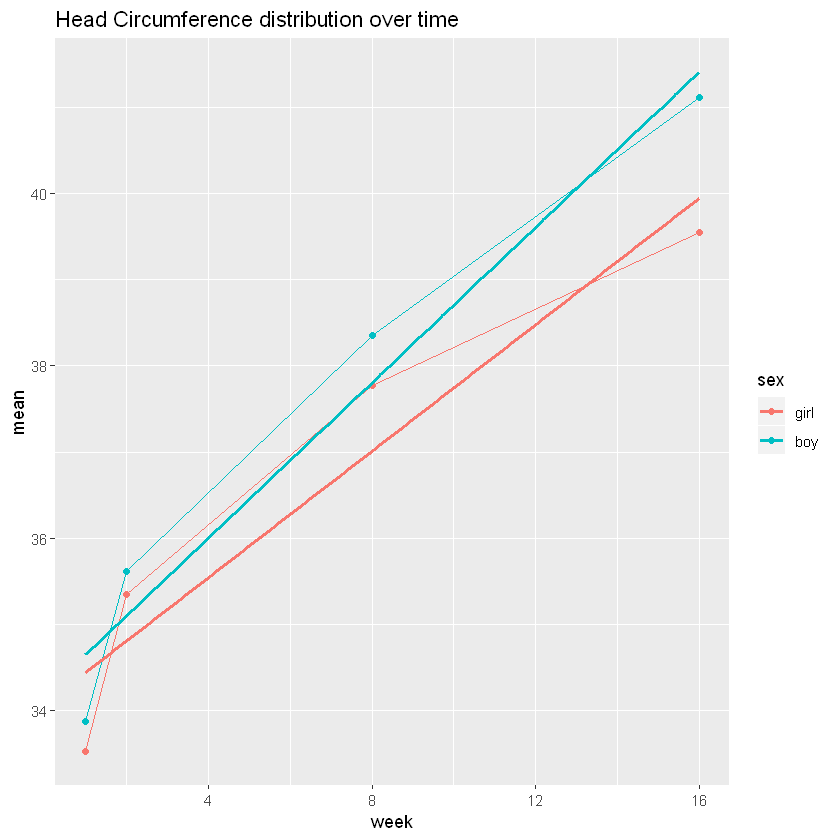

In [127]:
headCDist <- headCLong %>% filter(!is.na(sex)) %>% group_by(sex, week) %>% 
        summarise(mean = mean(head_c, na.rm = T), sd = sd(head_c, na.rm = T))

ggplot(headCDist, aes(x = week, y = mean, color = sex)) + 
    geom_point() + 
    #geom_errorbar(aes(ymin = mean - 2*sd, ymax = mean + 2*sd), alpha = 0.5) + 
    geom_line() + geom_smooth(method = lm, se = F) +
    ggtitle('Head Circumference distribution over time')

In [132]:
summary(lm(weightDist, formula = mean ~ week + sex + week:sex))


Call:
lm(formula = mean ~ week + sex + week:sex, data = weightDist)

Residuals:
      1       2       3       4       5       6       7       8 
-142.77   58.29  165.70  -81.21 -279.17  276.06   40.34  -37.23 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3365.70     174.91  19.243  4.3e-05 ***
week          223.54      19.40  11.520 0.000324 ***
sexboy       -185.37     247.35  -0.749 0.495267    
week:sexboy    32.75      27.44   1.194 0.298597    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 231.8 on 4 degrees of freedom
Multiple R-squared:  0.9871,	Adjusted R-squared:  0.9775 
F-statistic: 102.4 on 3 and 4 DF,  p-value: 0.0003084


In [135]:
summary(lm(headCDist, formula = mean ~ week + sex + week:sex))


Call:
lm(formula = mean ~ week + sex + week:sex, data = headCDist)

Residuals:
      1       2       3       4       5       6       7       8 
-0.9137  0.5435  0.7621 -0.3919 -0.7740  0.5162  0.5478 -0.2901 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.07687    0.66572  51.188 8.72e-07 ***
week         0.36628    0.07385   4.959  0.00771 ** 
sexboy       0.12198    0.94147   0.130  0.90317    
week:sexboy  0.08387    0.10445   0.803  0.46700    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8824 on 4 degrees of freedom
Multiple R-squared:  0.9403,	Adjusted R-squared:  0.8955 
F-statistic: 20.99 on 3 and 4 DF,  p-value: 0.006556


## Group and Free AA levels

In [38]:
table = table( AA_E %>% select(sex, group)) 
print(table)

      group
sex    teen adult
  girl   13    13
  boy    24    11


Teen mothers have almost twice the number of boys: 24 boys and 13 girls. Is there an assosiation between group and sex? 


$H_0:$ group and sex are independent.

In [37]:
print(chisq.test(table))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table
X-squared = 1.448, df = 1, p-value = 0.2288



$P(independence) \approx 0.23$ 